## 3 - Template Matching
In this problem we will look at how to ﬁnd a template pattern in a cluttered scene. In order to make it more fun we will use ‘Where is Waldo?’ (https://en.wikipedia.org/wiki/Where%27s Wally%3F) puzzle. You are given a scene of an amusement park shown in Figure 3(a) and you have to ﬁnd Waldo, shown in Figure 3(b).

#### 1. Given a reference image (scene of an amusement park) and a template image (face of Waldo), iterate over all pixel locations of reference image and compare the local patch with template image using sum of square distance (SSD) metric. Display SSD for whole image. Find the location ((x,y) coordinate) where the SSD is minimum and see if you can ﬁnd Waldo there!

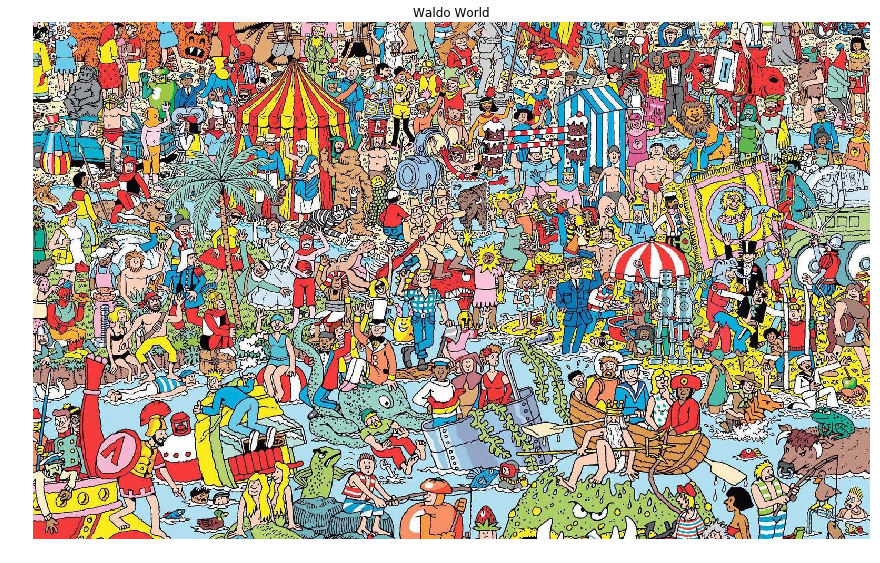

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load waldo world
waldo_world = cv2.imread('where_is_waldo.jpg')

# display waldo world
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cv2.cvtColor(waldo_world, cv2.COLOR_BGR2RGB))
plt.title("Waldo World")
plt.show()

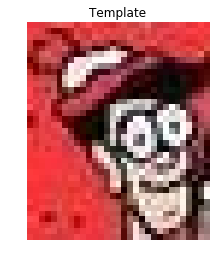

In [4]:
# load template image
template1 = cv2.imread('template1.png')

# display waldo world
plt.axis('off')
plt.imshow(cv2.cvtColor(template1, cv2.COLOR_BGR2RGB))
plt.title("Template")
plt.show()

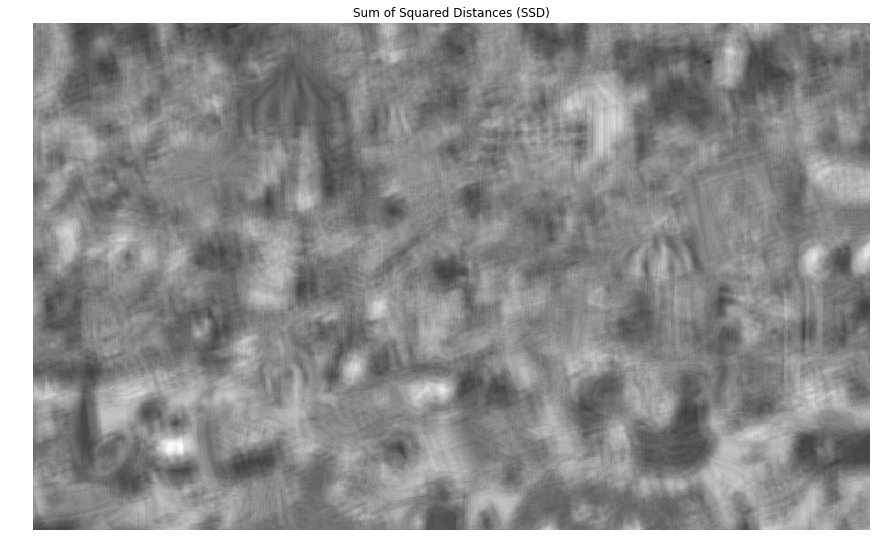

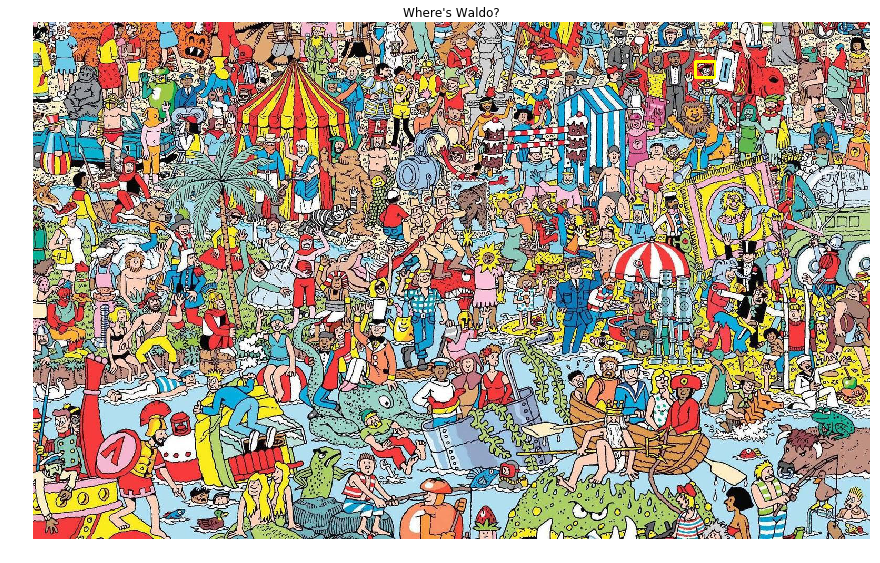

In [12]:
''' Performs template matching using SSD method given and image and a template '''
def templateMatch(img, template):
    # make copy of the input image 
    result = img.copy()
    # use template match function
    ssd = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
    
    # display result
    plt.figure(figsize=(15,15))
    plt.axis('off')
    plt.imshow(ssd, cmap='gray')
    plt.title("Sum of Squared Distances (SSD)")
    plt.show()
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ssd)
    # use SSD to draw rectangular boxes
    w, h = template.shape[0:2]
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(result,top_left, bottom_right,(0,255,255), 4)
    return result

# perform template matching
matched = templateMatch(waldo_world, template1)

# display result
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
plt.title("Where's Waldo?")
plt.show()

#### 2. Repeat above process with the noisy template as shown in Figure 3(c).

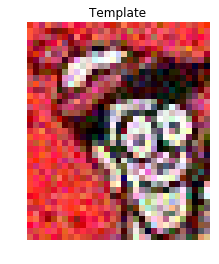

In [15]:
# load template image
template2 = cv2.imread('template2.png')

# display waldo world
plt.axis('off')
plt.imshow(cv2.cvtColor(template2, cv2.COLOR_BGR2RGB))
plt.title("Template")
plt.show()

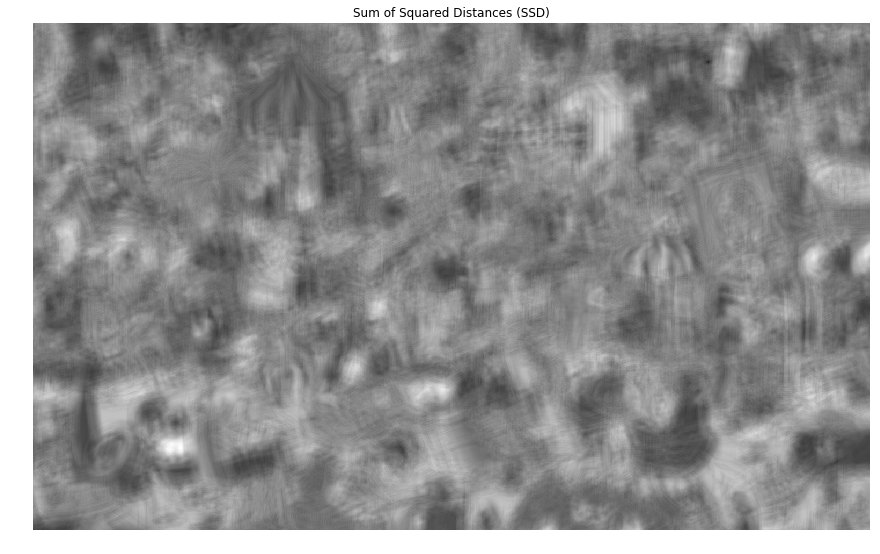

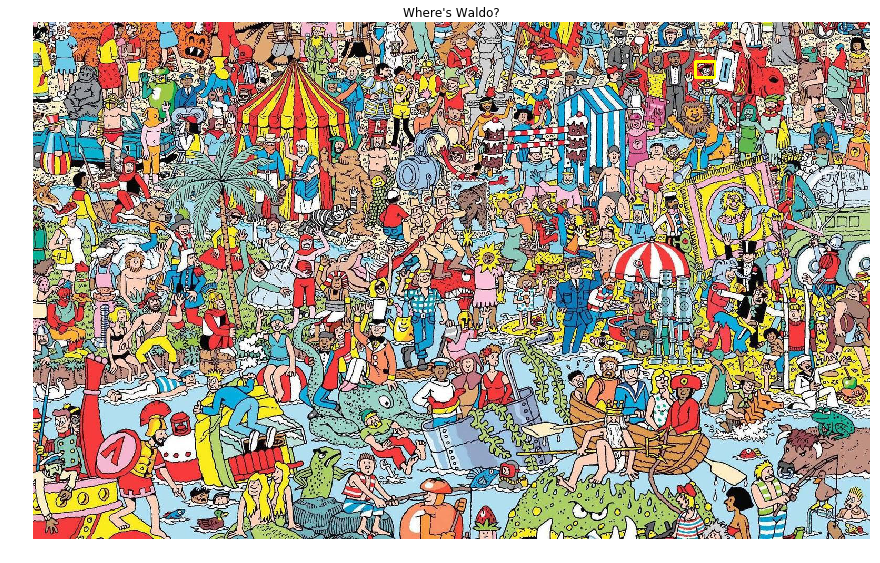

In [16]:
# perform template matching
matched = templateMatch(waldo_world, template2)

# display result
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
plt.title("Where's Waldo?")
plt.show()